In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./CAR DETAILS FROM CAR DEKHO.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### 행과 열 개수 확인

In [3]:
print(f"data 행과 열의 개수: {data.shape}")
print(data.columns)

data 행과 열의 개수: (4340, 8)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


### 범주형 데이터 확인

In [4]:
data.select_dtypes(object).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [5]:
print(len(data.select_dtypes(object).columns))

5


# 결측치 확인
----------------------------------------------

In [6]:
data.info() #결측값이 없음 #히스토그램 뽑아보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
data.notnull().sum()

name             4340
year             4340
selling_price    4340
km_driven        4340
fuel             4340
seller_type      4340
transmission     4340
owner            4340
dtype: int64

**int형 데이터 결측값 히스토그램**
 - int형 데이터의 결측값은 없다.

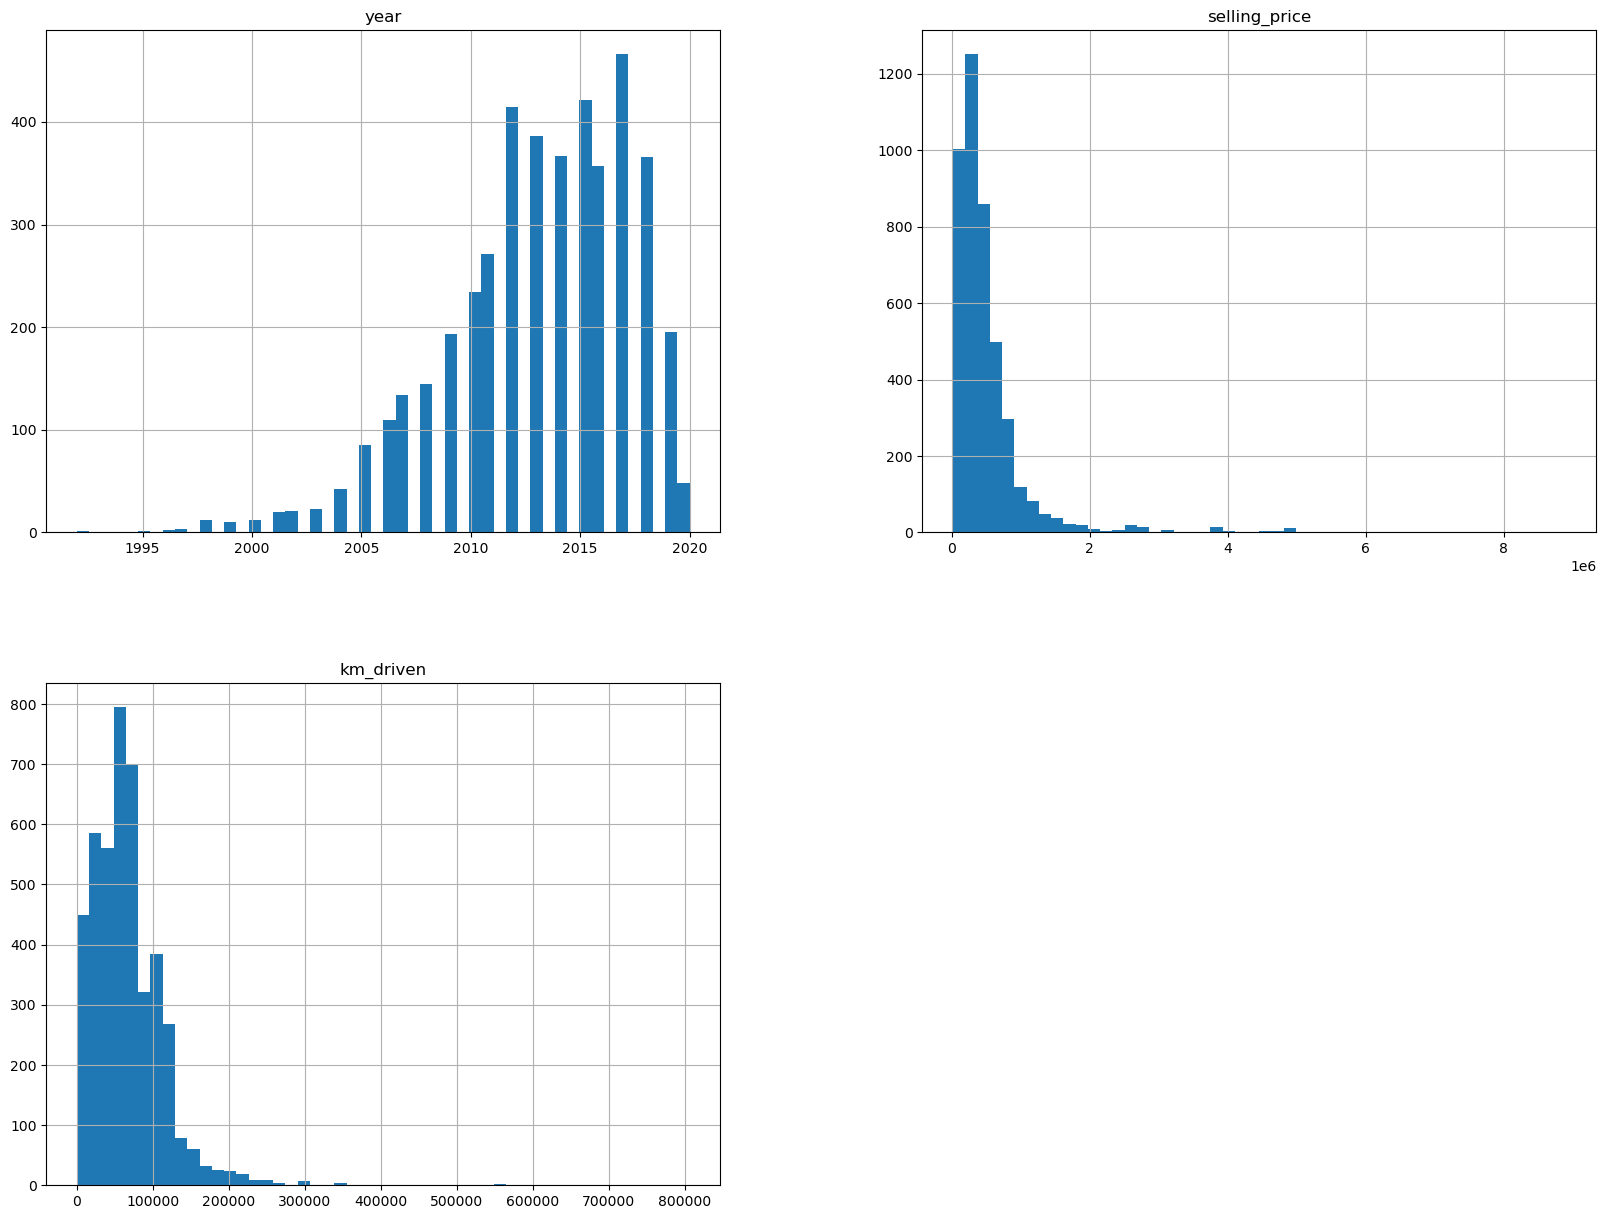

In [9]:
%matplotlib inline

data.hist(bins=50, figsize=(20,15))     
plt.savefig('histogram_int.jpg')
plt.show()

**objest(str)타입 데이터 결측갑 결과**
   - 결측값이 없다.

In [10]:
column_type_str = ['name','fuel','seller_type','transmission','owner']
for i in column_type_str:
    Miss = len(data.loc[data[i] == '0'])
    print(f'Miss_{i}: {Miss}')

Miss_name: 0
Miss_fuel: 0
Miss_seller_type: 0
Miss_transmission: 0
Miss_owner: 0


In [11]:
column_type_int = ['year','selling_price']
for i in column_type_int:
    Miss = len(data.loc[data[i] == 0])
    print(f'Miss_{i}: {Miss}')

Miss_year: 0
Miss_selling_price: 0


1번
=============================
### 문제 1번:  csv파일은 한 중고차 업체가 보유한 중고차 매물의 목록입니다. csv 파일을 Pandas DataFrame으로 받고, 연도 별 차량 보유 대수를 출력해 보세요.

In [12]:
year_sort = data['year'].sort_values()  #년도를 정렬한 결과 1992년식부터 ~ 2020년식까지 있음
print(year_sort)

3334    1992
631     1995
2972    1996
61      1996
1669    1997
        ... 
2137    2020
1432    2020
1774    2020
176     2020
3933    2020
Name: year, Length: 4340, dtype: int64


In [13]:
i = 1992
sum = 0

while i < 2021:
    result = len(data.loc[data['year'] == i])
    print(f"{i}년식 = {result} 대")
    sum += result
    i+= 1

print(f"총합 = {sum} 대")   #년도별 결과 , 총합 4340개로 column의 갯수와 맞음

1992년식 = 1 대
1993년식 = 0 대
1994년식 = 0 대
1995년식 = 1 대
1996년식 = 2 대
1997년식 = 3 대
1998년식 = 12 대
1999년식 = 10 대
2000년식 = 12 대
2001년식 = 20 대
2002년식 = 21 대
2003년식 = 23 대
2004년식 = 42 대
2005년식 = 85 대
2006년식 = 110 대
2007년식 = 134 대
2008년식 = 145 대
2009년식 = 193 대
2010년식 = 234 대
2011년식 = 271 대
2012년식 = 415 대
2013년식 = 386 대
2014년식 = 367 대
2015년식 = 421 대
2016년식 = 357 대
2017년식 = 466 대
2018년식 = 366 대
2019년식 = 195 대
2020년식 = 48 대
총합 = 4340 대


In [14]:
groups = data.groupby('year')
groups.size()

year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
dtype: int64

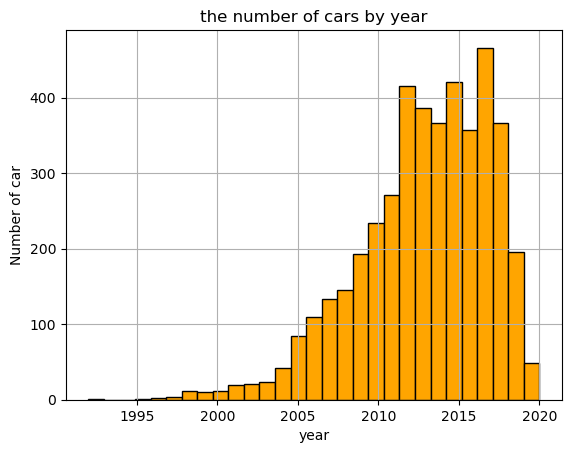

In [15]:
data['year'].plot(kind='hist', bins = 29, color='orange',edgecolor='k',grid=True)
plt.title('the number of cars by year')
plt.ylabel('Number of car',size=10)
plt.xlabel('year',size=10)
plt.savefig('the number of cars by year.jpg')
plt.show()

In [16]:
#data['year'].value_counts().plot(kind='bar')

2번
=========================
### 문제 2번: x축은 출고 년도, y축은 평균 판매가로 꺾은선 그래프를 그려 보세요.

In [17]:
M_price = data.groupby(['year'])['selling_price'].mean()
print(M_price)

year
1992    5.000000e+04
1995    9.500000e+04
1996    2.250000e+05
1997    9.300000e+04
1998    2.140000e+05
1999    7.350000e+04
2000    8.150000e+04
2001    1.176499e+05
2002    9.071429e+04
2003    8.656522e+04
2004    1.217500e+05
2005    1.090130e+05
2006    1.577999e+05
2007    1.628284e+05
2008    1.742013e+05
2009    2.295647e+05
2010    2.696781e+05
2011    2.936383e+05
2012    3.716289e+05
2013    4.848010e+05
2014    5.232316e+05
2015    5.289430e+05
2016    6.083641e+05
2017    7.689098e+05
2018    9.107705e+05
2019    1.059020e+06
2020    8.184791e+05
Name: selling_price, dtype: float64


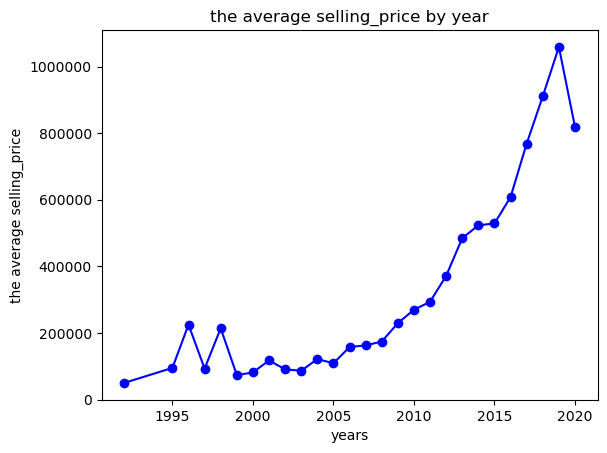

In [18]:
plt.title('the average selling_price by year')
plt.ticklabel_format(style='plain')
plt.xlabel('years')
plt.ylabel('the average selling_price')
plt.plot(M_price,color='blue',marker='o')
plt.savefig('the average selling_price by year.jpg')

3번
======================
### 문제 3번: x축은 자동차 브랜드, y축은 자동차 보유 대수로 막대그래프를 내림차순으로 그려 보세요.

In [19]:
#data['name'].str.split(" ").head()
data['brand']=data.name.str.split(' ').str[0]
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [20]:
#data.info() # brand 결측값이 없음
data['brand'].isnull().sum()

0

In [21]:
 Miss = len(data.loc[data['brand'] == '0'])
print(f'Miss_brand: {Miss}')

Miss_brand: 0


In [22]:
# groups_brand = data.groupby('brand')
# groups_brand.size()

In [23]:
# brand_count=data.groupby('brand').size()
# print(brand_count)
# print(brand_count.index)
# brand_idx = brand_count.index.to_list()
# print(brand_idx)
# print(type(brand_idx))
# brand_count=data.groupby('brand').size()
# print(list(brand_count))

In [24]:
brand_count_sort=data.groupby('brand').size().sort_values(ascending=False)
print(brand_count_sort)
print(brand_count_sort.index)

brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64
Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Ford', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Skoda', 'Nissan', 'Audi', 'BMW',
       'Fiat', 'Datsun', 'Mercedes-Benz', 'Mitsubishi', 'Jaguar', 'Land',
       'Ambassador', 'Volvo', 'Jeep', 'OpelCorsa', 'MG', 'Isuzu', 'Force',
       'Daewoo', 'Kia'],
      dtype='ob

In [25]:
brand_count_idx = brand_count_sort.index.to_list()
brand_count_value = list(brand_count_sort)
# print(brand_count_idx)
# print(brand_count_value)

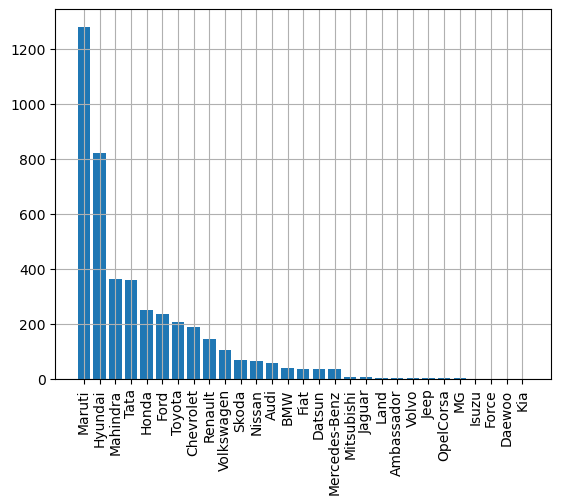

In [26]:
plt.bar(brand_count_idx,brand_count_value,width= 0.8)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [27]:
# group_brand = data.groupby(['brand']).size().rename('count').to_frame()
# #print(group_brand)
# group_brand


4번
=============================
### 문제 4번: 출고년도, 운행km, 연료 등의 정보를 토대로 중고차 가격에 가장 큰 영향을 끼치는 요소가 무엇인지 분석해 보세요.

In [28]:
# new=pd.DataFrame(data['brand'].value_counts()/data['brand'].count())
# new.reset_index(inplace=True)
# new

In [29]:
# data.corr()

In [30]:
# sns.heatmap(data.corr())

In [31]:
# sns.barplot( x=data['fuel'],y=data['selling_price'])

In [32]:
# sns.stripplot(x=data['fuel'],y=data['selling_price'])

In [33]:
# sns.countplot(x='fuel',data=data)

In [34]:
# sns.boxplot(x='selling_price',y='fuel',data=data)

### 범주형 데이터 처리 (One Hot Encoder)

In [35]:
data.select_dtypes(object).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand'], dtype='object')

In [36]:
data_copy=data.copy()
data_copy=data_copy.drop(['name'],axis=1)
data_copy

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


## One-Hot_Encoding

In [37]:
data_encoding=pd.get_dummies(data_copy,columns=['fuel','seller_type','transmission','owner','brand'])
data_encoding

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2007,60000,70000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,2014,409999,80000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,2009,110000,83000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,2016,865000,90000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(data_encoding.columns)

Index(['year', 'selling_price', 'km_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Ambassador',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')


## year, km_driven

In [39]:
data_int=data_encoding.loc[:,'year':'km_driven']
data_int

,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000
...,...,...,...
4335,2014,409999,80000
4336,2014,409999,80000
4337,2009,110000,83000
4338,2016,865000,90000


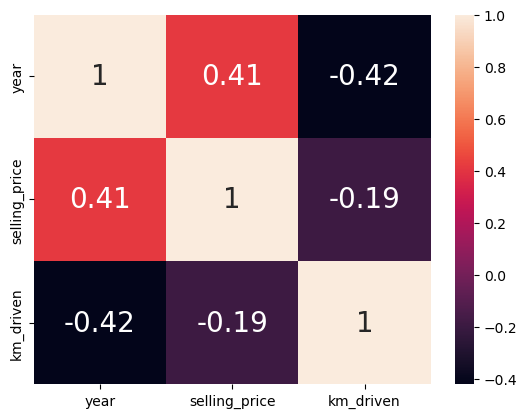

In [40]:
#plt.figure(figsize=(30,30))
sns.heatmap(data=data_int.corr(),annot=True,annot_kws={'size':20})
plt.savefig("heatmap_year_km.jpg")

## Fuel

In [41]:
data_fuel=data_encoding.loc[:,'fuel_CNG':'fuel_Petrol']
data_fuel=pd.concat([data_copy['selling_price'],data_fuel],axis=1)
data_fuel

,selling_price,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,60000,0,0,0,0,1
1,135000,0,0,0,0,1
2,600000,0,1,0,0,0
3,250000,0,0,0,0,1
4,450000,0,1,0,0,0
...,...,...,...,...,...,...
4335,409999,0,1,0,0,0
4336,409999,0,1,0,0,0
4337,110000,0,0,0,0,1
4338,865000,0,1,0,0,0


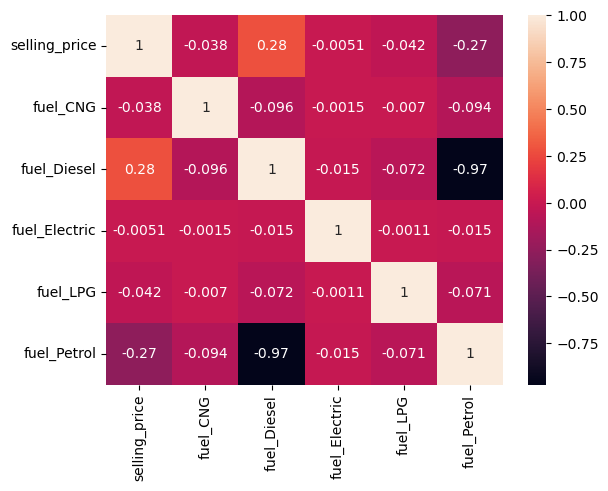

In [42]:
#plt.figure(figsize=(30,30))
sns.heatmap(data=data_fuel.corr(),annot=True)
plt.savefig("heatmap_fuel.jpg")

## Seller_type

In [43]:
data_seller=data_encoding.loc[:,'seller_type_Dealer':'seller_type_Trustmark Dealer']
data_seller=pd.concat([data_copy['selling_price'],data_seller],axis=1)
data_seller

,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,60000,0,1,0
1,135000,0,1,0
2,600000,0,1,0
3,250000,0,1,0
4,450000,0,1,0
...,...,...,...,...
4335,409999,0,1,0
4336,409999,0,1,0
4337,110000,0,1,0
4338,865000,0,1,0


<AxesSubplot:>

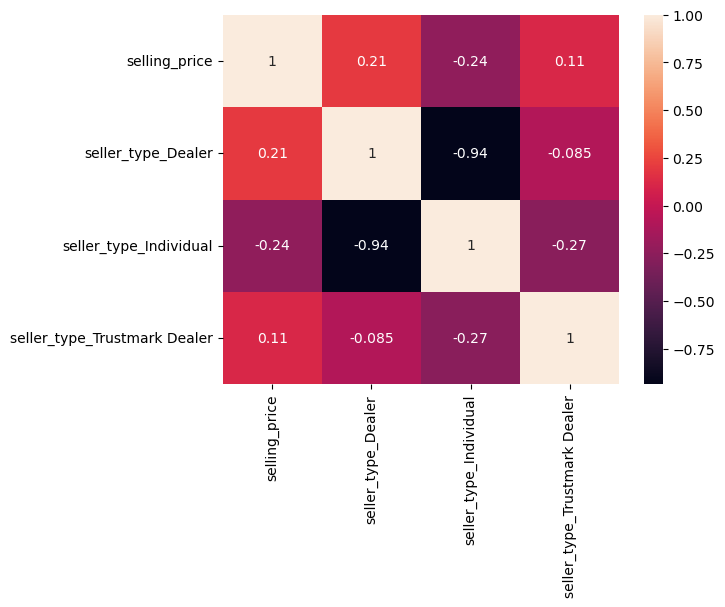

In [44]:
#plt.figure(figsize=(30,30))
sns.heatmap(data=data_seller.corr(),annot=True)

## transmission

In [45]:
data_transmission=data_encoding.loc[:,'transmission_Automatic':'transmission_Manual']
data_transmission=pd.concat([data_copy['selling_price'],data_transmission],axis=1)
data_transmission

,selling_price,transmission_Automatic,transmission_Manual
0,60000,0,1
1,135000,0,1
2,600000,0,1
3,250000,0,1
4,450000,0,1
...,...,...,...
4335,409999,0,1
4336,409999,0,1
4337,110000,0,1
4338,865000,0,1


<AxesSubplot:>

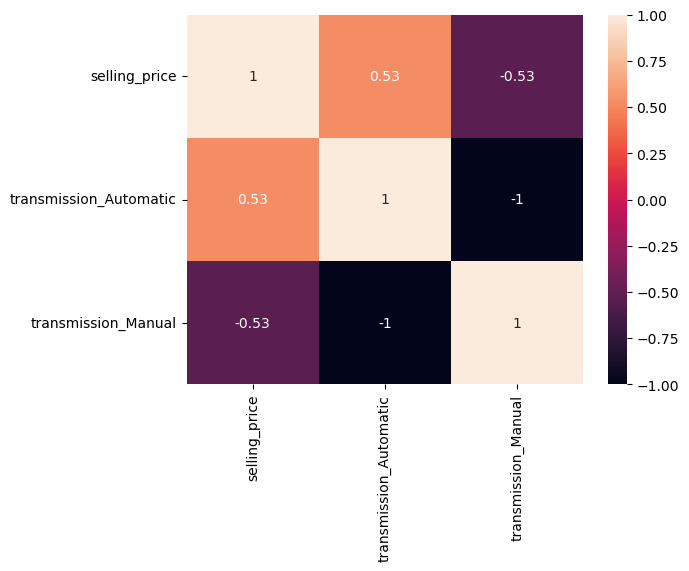

In [46]:
#plt.figure(figsize=(30,30))
sns.heatmap(data=data_transmission.corr(),annot=True)

## Owner

In [47]:
data_owner=data_encoding.loc[:,'owner_First Owner':'owner_Third Owner']
data_owner=pd.concat([data_copy['selling_price'],data_owner],axis=1)
data_owner

,selling_price,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,1,0,0,0,0
1,135000,1,0,0,0,0
2,600000,1,0,0,0,0
3,250000,1,0,0,0,0
4,450000,0,0,1,0,0
...,...,...,...,...,...,...
4335,409999,0,0,1,0,0
4336,409999,0,0,1,0,0
4337,110000,0,0,1,0,0
4338,865000,1,0,0,0,0


<AxesSubplot:>

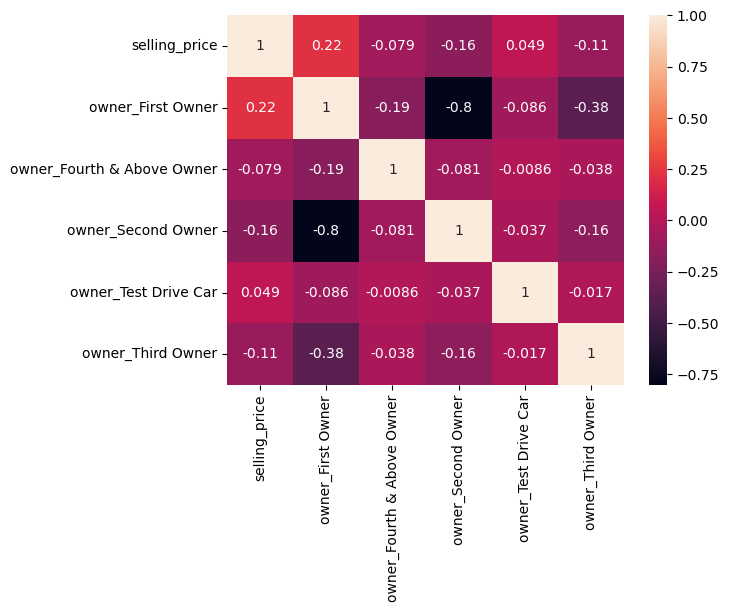

In [48]:
#plt.figure(figsize=(30,30))
sns.heatmap(data=data_owner.corr(),annot=True)

## brand

In [49]:
data_brand=data_encoding.loc[:,'brand_Ambassador':'brand_Volvo']
data_brand=pd.concat([data_copy['selling_price'],data_brand],axis=1)
data_brand

,selling_price,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,60000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,135000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,600000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,409999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,110000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,865000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

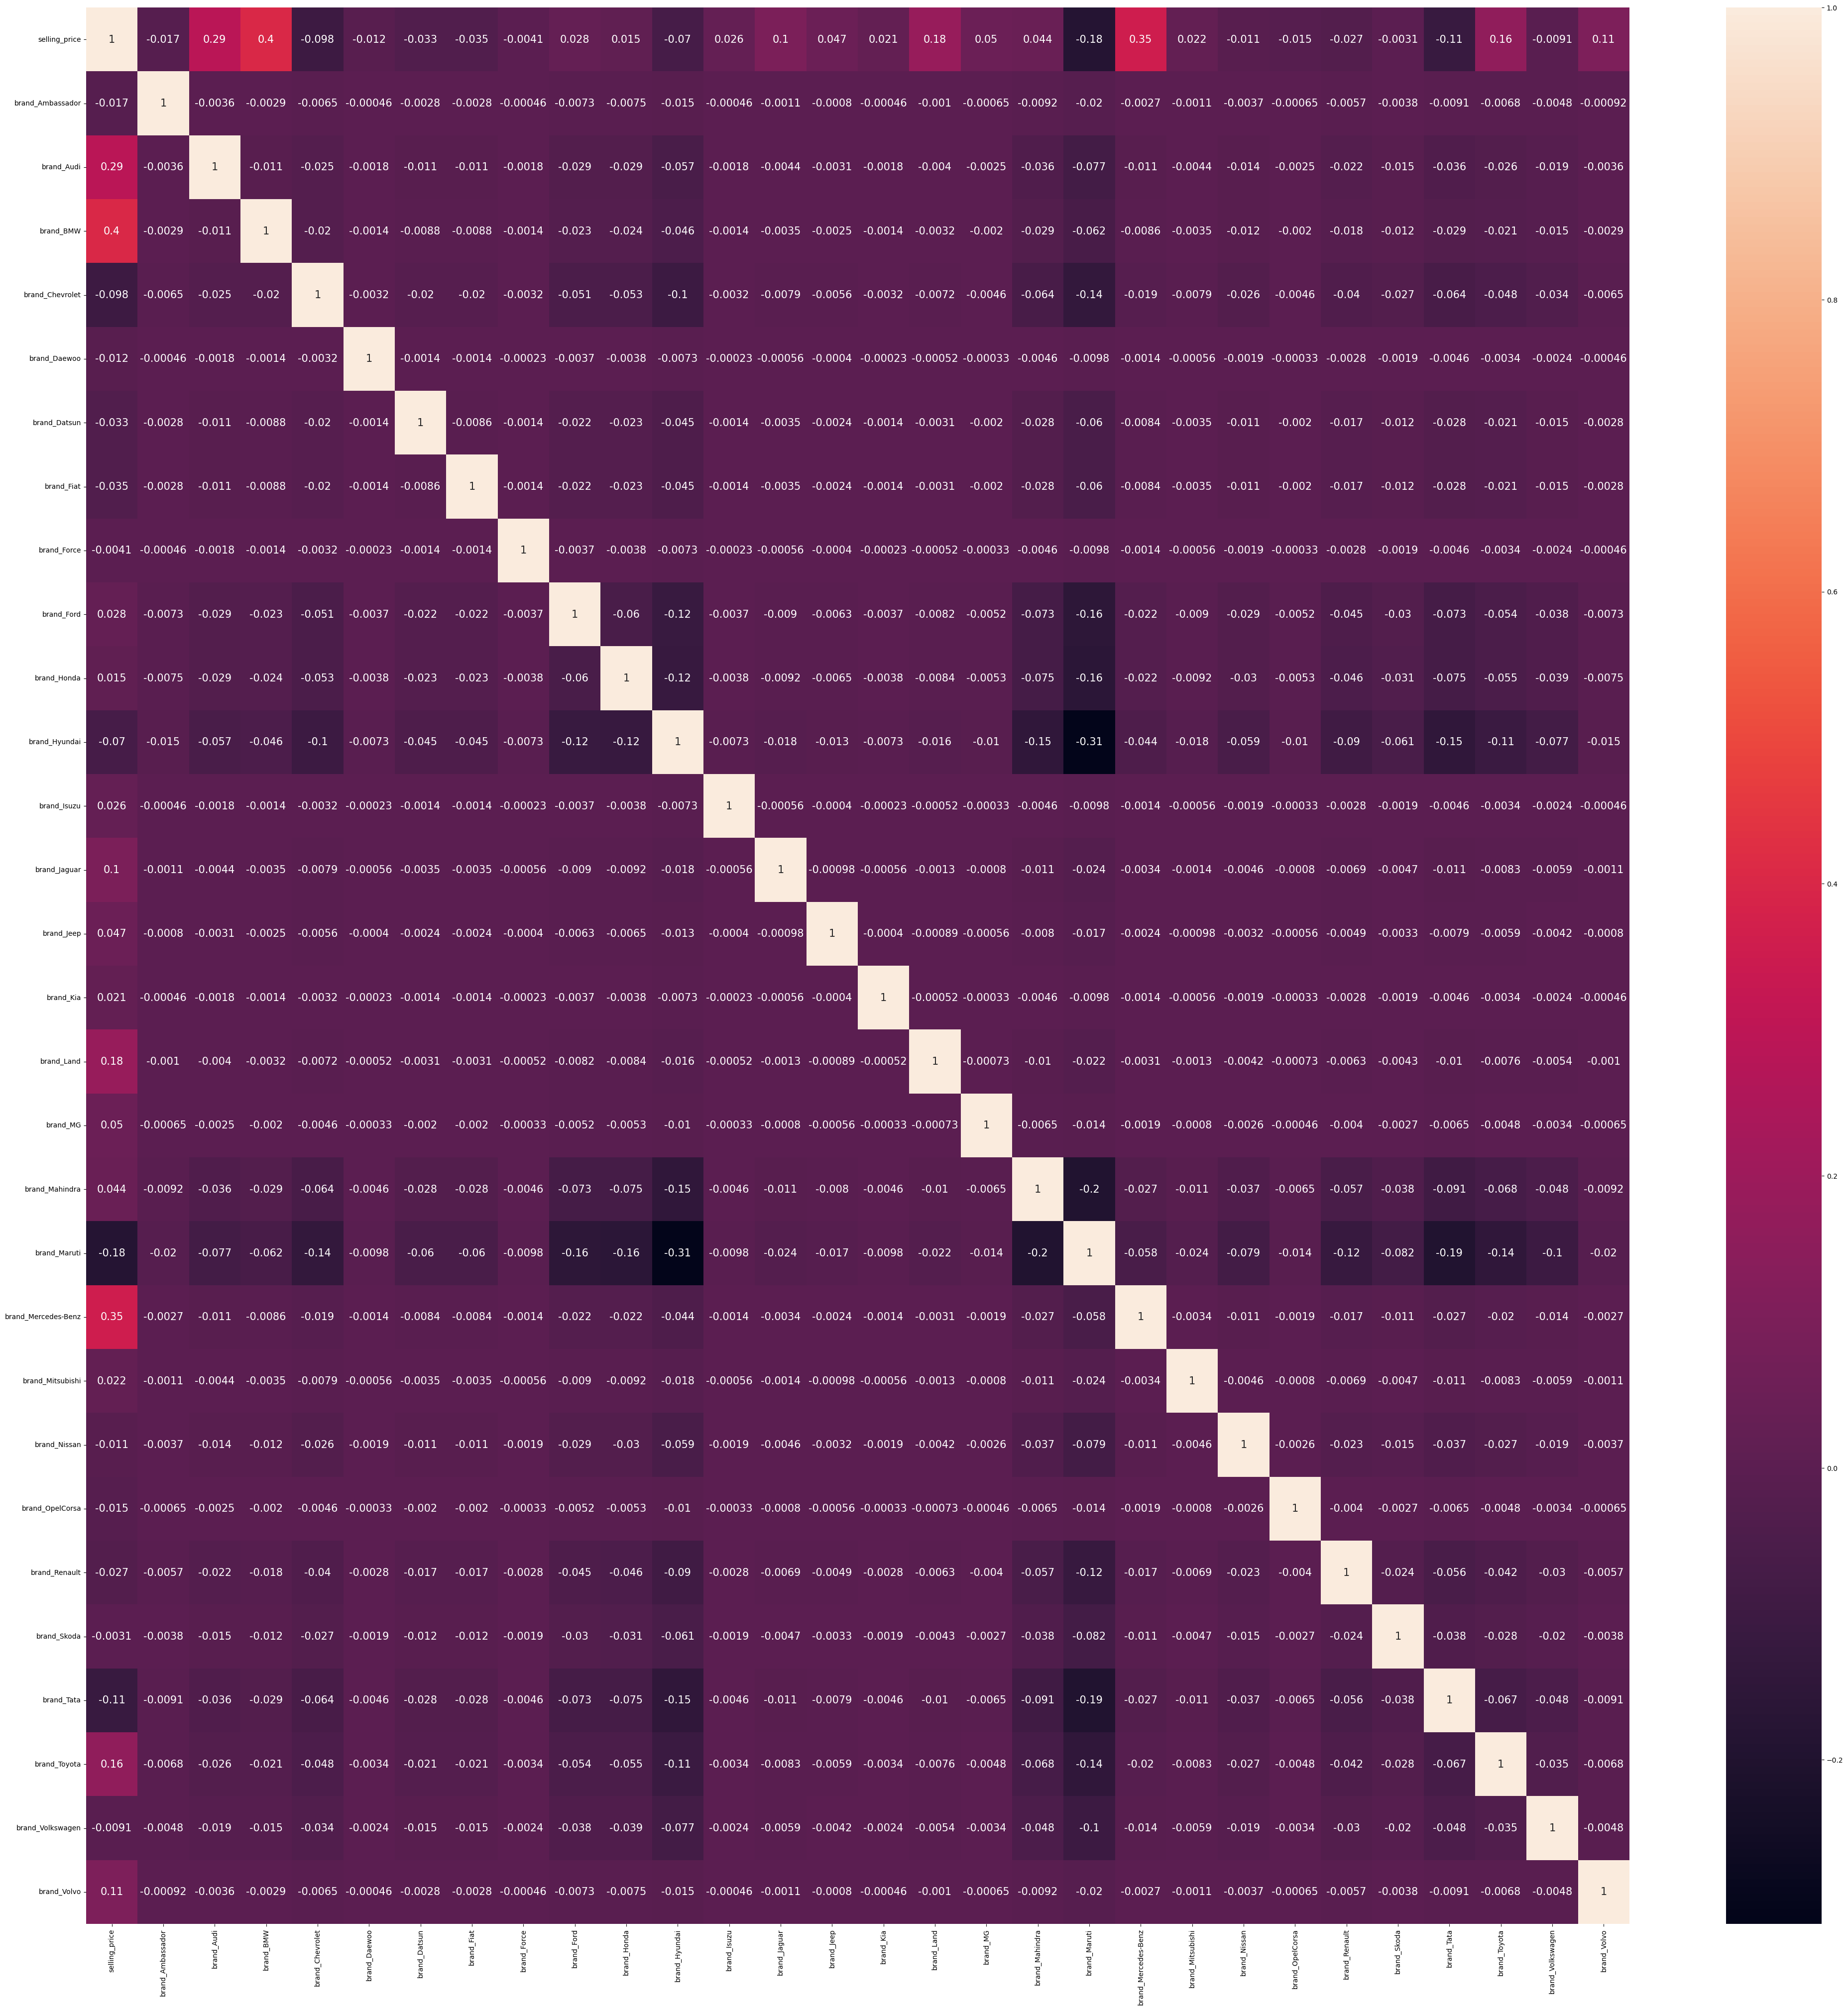

In [50]:
plt.figure(figsize=(50,50))
sns.heatmap(data=data_brand.corr(),annot=True,annot_kws={'size':15})  #,annot_kws={'size':15}

## 전체 상관계수

In [51]:
data_encoding.corr()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
year,1.000000,0.413922,-0.419688,0.008792,0.121424,-0.025540,-0.051266,-0.114908,0.143464,-0.173703,...,0.002948,-0.019928,0.025484,-0.051406,0.102707,-0.031330,-0.050435,-0.000437,0.008914,0.015560
selling_price,0.413922,1.000000,-0.192289,-0.037839,0.282947,-0.005095,-0.042434,-0.269453,0.205111,-0.236798,...,0.354215,0.021603,-0.011460,-0.015427,-0.027335,-0.003078,-0.114574,0.162161,-0.009094,0.107745
km_driven,-0.419688,-0.192289,1.000000,0.002107,0.285396,-0.001372,0.036652,-0.291139,-0.156465,0.182663,...,-0.044987,0.059910,0.006476,0.009339,-0.075188,0.044299,0.062762,0.163598,0.029182,0.013371
fuel_CNG,0.008792,-0.037839,0.002107,1.000000,-0.095696,-0.001464,-0.007040,-0.094382,-0.000926,0.006112,...,-0.008696,-0.003589,-0.011800,-0.002071,-0.017995,-0.012168,-0.020320,-0.021530,-0.015334,-0.002929
fuel_Diesel,0.121424,0.282947,0.285396,-0.095696,1.000000,-0.015063,-0.072422,-0.970934,0.039364,-0.035314,...,0.059961,0.025097,0.046838,-0.021304,0.011686,0.071495,0.089971,0.138290,0.062169,0.030612
fuel_Electric,-0.025540,-0.005095,-0.001372,-0.001464,-0.015063,1.000000,-0.001108,-0.014856,0.027853,-0.026118,...,-0.001369,-0.000565,-0.001857,-0.000326,-0.002832,-0.001915,-0.004573,0.068007,-0.002414,-0.000461
fuel_LPG,-0.051266,-0.042434,0.036652,-0.007040,-0.072422,-0.001108,1.000000,-0.071427,-0.032231,0.035122,...,-0.006581,-0.002716,-0.008930,-0.001567,-0.013619,-0.009209,-0.021986,-0.016294,-0.011605,-0.002217
fuel_Petrol,-0.114908,-0.269453,-0.291139,-0.094382,-0.970934,-0.014856,-0.071427,1.000000,-0.035360,0.029845,...,-0.057313,-0.024005,-0.043238,0.021942,-0.006184,-0.067787,-0.082773,-0.133901,-0.057491,-0.029722
seller_type_Dealer,0.143464,0.205111,-0.156465,-0.000926,0.039364,0.027853,-0.032231,-0.035360,1.000000,-0.937703,...,0.097993,-0.005522,-0.002994,-0.011703,0.019954,0.037203,-0.104603,-0.023675,0.054786,0.019586
seller_type_Individual,-0.173703,-0.236798,0.182663,0.006112,-0.035314,-0.026118,0.035122,0.029845,-0.937703,1.000000,...,-0.089900,0.007354,0.009513,0.012481,-0.015089,-0.029157,0.117464,-0.002439,-0.044388,-0.017300
